In [2]:
!pip install pyAgrum
import pyAgrum as gum

     |████████████████████████████████| 4.5MB 4.9MB/s 


# Exercício sobre redes semânticas

Neste exercício vamos criar uma rede semântica e inferir a partir dela, baseado neste [notebook](http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/01-tutorial.ipynb.html).

## Exemplo inicial

Imagine que temos um ambiente que contém grama e queremos saber se a grama está molhada ou não. Porém, a grama pode estar molhada por conta da chuva, ou por conta de um aspersor de água automático. 

A cidade que está localizada o ambiente varia entre nublado e ensolarado na mesma frequência. Quando está nublado é provável que chova. Quando não está nublado é provável que não chova.

Quando não está nublado, o aspersor fica acionado e desligado na mesma frequência. Já quando está nublado, muito pouco provável que o aspersor estará acionado.

Quando não chove nem o aspersor está ligado, é certo de a grama não estar molhada. Quando o aspersor está ligado e não está chovendo ou quando o aspersor está desligado e está chovendo, é muito provável que a grama esteja molhada. Já se o aspersor está ligado e está chovendo, é quase certo de a grama estar molhada.

Esta descrição está codificada na visualização abaixo.

![alt text](http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/images/waterprinkler.png)

Agora vamos criar nossa rede bayesiana:

In [3]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


Em seguida criaremos os quatro nós:

In [0]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
s=bn.add(gum.LabelizedVariable('s','sprinkler ?',2))
r=bn.add(gum.LabelizedVariable('r','rain ?',2))
w=bn.add(gum.LabelizedVariable('w','wet grass ?',2))

E os arcos que ligam eles:

In [0]:
bn.addArc(c,s)
bn.addArc(c,r)
bn.addArc(s,w)
bn.addArc(r,w)

De forma que a rede está desta forma:

In [6]:
import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x4aa7000) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

Agora vamos criar as tabelas de probabilidades associadas a cada nó. Quando o nó não tem condições a priori, ele é definido da seguinte forma:

In [7]:
bn.cpt(c).fillWith([0.5,0.5])

(gum::Potential<double>@0x3267c60) <c:0> :: 0.5 /<c:1> :: 0.5

Quando ele tem condições a priori, é definido desta forma:

In [8]:
bn.cpt(s)[{'c': 0}] = [0.5,0.5]
bn.cpt(s)[{'c': 1}] = [0.9,0.1]
bn.cpt(s)

(gum::Potential<double>@0x4420620) <s:0|c:0> :: 0.5 /<s:1|c:0> :: 0.5 /<s:0|c:1> :: 0.9 /<s:1|c:1> :: 0.1

In [9]:
bn.cpt(w)[{'r': 0, 's': 0}] = [1, 0]
bn.cpt(w)[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt(w)

(gum::Potential<double>@0x44209c0) <w:0|s:0|r:0> :: 1 /<w:1|s:0|r:0> :: 0 /<w:0|s:1|r:0> :: 0.1 /<w:1|s:1|r:0> :: 0.9 /<w:0|s:0|r:1> :: 0.1 /<w:1|s:0|r:1> :: 0.9 /<w:0|s:1|r:1> :: 0.01 /<w:1|s:1|r:1> :: 0.99

In [10]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]
bn.cpt(r)

(gum::Potential<double>@0x4420800) <r:0|c:0> :: 0.8 /<r:1|c:0> :: 0.2 /<r:0|c:1> :: 0.2 /<r:1|c:1> :: 0.8

Qual é a probabilidade de a grama estar molhada em um caso geral?

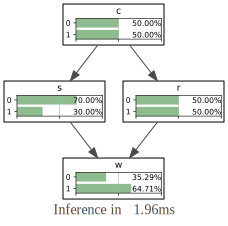

In [11]:
gnb.showInference(bn,evs={})

Vemos que a probabilidade da grama estar molhada no geral é de 64,7%

Supondo que queremos inferir a partir das seguintes condições a priori:
Não está nublado e o aspersor está ligado. Qual a probabilidade de a grama estar molhada?

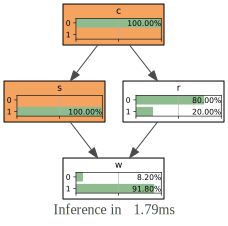

In [12]:
gnb.showInference(bn,evs={'s':1,'c':0})

Vemos que a probabilidade é de 91,8%.



## Agora é sua vez!

Imagine que está nublado e está chovendo. Qual a probabilidade da grama estar molhada?

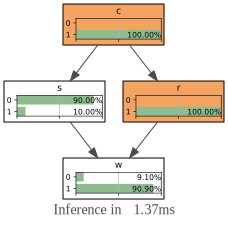

In [13]:
gnb.showInference(bn,evs={'c':1,'r':1})

Resposta: A probabilidade da grama estar molhada é de 90,9%

Agora queremos que você crie sua própria rede bayesiana baseada em um cenário novo:

Um carro tem muitos componentes que são suscetíveis a falhas. Queremos saber se o nosso carro vai funcionar o motor ou não. 


A bateria do carro foi comprada já usada, então possivelmente ela seja velha. Já o alternador e a correia do alternador são originais, então é pouco provável que estejam quebradas.

Se a bateria do carro for velha, é provável que ela esteja descarregada. Se o alternador do carro estiver quebrado, é quase certo de que a bateria descarregue. Se a correia do alternador do carro estiver quebrada, é quase certo de que a bateria descarregue.

Se a bateria do carro está descarrregada, é quase certo do carro não ligar. Se o óleo do motor estiver baixo, é possível que o motor venha a fundir e, obviamente, não ligar. Se o carro estiver sem gasolina, é certo de o carro não ligar.

1. Construa uma rede bayesiana que represente o texto acima fazendo uso do pyAgrum.
2. Estime subjetivamente, com base no texto, as tabelas de probabilidades e insira-as na rede bayesiana.
3. Responda as seguintes perguntas: 
    1. No caso geral, qual a probabilidade de o carro não ligar?
    2. Se a correia do alternador estiver quebrada e a bateria esteja descarregada, qual a probabilidade do carro ligar?
    3. Se o óleo estiver baixo, qual a probabilidade de o carro ligar?

A probabilidade é de ...



1.  11,16%
2.   2,5%
3.  4,88%


In [14]:
rede=gum.BayesNet('Carro')

d=rede.add(gum.LabelizedVariable('d','bateria velha ?',2))
e=rede.add(gum.LabelizedVariable('e','alternador quebrado ?',2))
f=rede.add(gum.LabelizedVariable('f','correia quebrada ?',2))
g=rede.add(gum.LabelizedVariable('g','bateria descarregada ?',2))
h=rede.add(gum.LabelizedVariable('h','nível de óleo baixo ?',2))
i=rede.add(gum.LabelizedVariable('i','sem gasolina ?',2))
j=rede.add(gum.LabelizedVariable('j','carro ligado ?',2))

rede.addArc(d,g)
rede.addArc(f,g)
rede.addArc(e,g)
rede.addArc(g,j)
rede.addArc(h,j)
rede.addArc(i,j)
rede


(gum::BayesNet<double>@0x4dc2c00) BN{nodes: 7, arcs: 6, domainSize: 128, dim: 42}

In [15]:
rede.cpt(d).fillWith([0.2,0.8])

(gum::Potential<double>@0x43fb880) <d:0> :: 0.2 /<d:1> :: 0.8

In [16]:
rede.cpt(e).fillWith([0.9,0.1])

(gum::Potential<double>@0x4125380) <e:0> :: 0.9 /<e:1> :: 0.1

In [17]:
rede.cpt(f).fillWith([0.9,0.1])

(gum::Potential<double>@0x517bc60) <f:0> :: 0.9 /<f:1> :: 0.1

In [18]:
rede.cpt(h).fillWith([0.5,0.5])

(gum::Potential<double>@0x517b8a0) <h:0> :: 0.5 /<h:1> :: 0.5

In [19]:
rede.cpt(i).fillWith([0.5,0.5])

(gum::Potential<double>@0x517b260) <i:0> :: 0.5 /<i:1> :: 0.5

In [20]:
rede.cpt(g)[{'d': 0,'e':0,'f':0}] = [0.99,0.01]
rede.cpt(g)[{'d': 0,'e':0,'f':1}] = [0.01,0.99]
rede.cpt(g)[{'d': 0,'e':1,'f':0}] = [0.01,0.99]
rede.cpt(g)[{'d': 0,'e':1,'f':1}] = [0.001,0.999]
rede.cpt(g)[{'d': 1,'e':0,'f':0}] = [0.20,0.80]
rede.cpt(g)[{'d': 1,'e':0,'f':1}] = [0.19,0.81]
rede.cpt(g)[{'d': 1,'e':1,'f':0}] = [0.19,0.81]
rede.cpt(g)[{'d': 1,'e':1,'f':1}] = [0.001,0.999]
rede.cpt(g)


(gum::Potential<double>@0x517b600) <g:0|d:0|f:0|e:0> :: 0.99 /<g:1|d:0|f:0|e:0> :: 0.01 /<g:0|d:1|f:0|e:0> :: 0.2 /<g:1|d:1|f:0|e:0> :: 0.8 /<g:0|d:0|f:1|e:0> :: 0.01 /<g:1|d:0|f:1|e:0> :: 0.99 /<g:0|d:1|f:1|e:0> :: 0.19 /<g:1|d:1|f:1|e:0> :: 0.81 /<g:0|d:0|f:0|e:1> :: 0.01 /<g:1|d:0|f:0|e:1> :: 0.99 /<g:0|d:1|f:0|e:1> :: 0.19 /<g:1|d:1|f:0|e:1> :: 0.81 /<g:0|d:0|f:1|e:1> :: 0.001 /<g:1|d:0|f:1|e:1> :: 0.999 /<g:0|d:1|f:1|e:1> :: 0.001 /<g:1|d:1|f:1|e:1> :: 0.999

In [21]:


rede.cpt(j)[{'g': 0,'h':0,'i':0}] = [0.01,0.99]
rede.cpt(j)[{'g': 0,'h':0,'i':1}] =  [1,0]
rede.cpt(j)[{'g': 0,'h':1,'i':0}] = [0.8,0.2]
rede.cpt(j)[{'g': 0,'h':1,'i':1}] =   [1,0]
rede.cpt(j)[{'g': 1,'h':0,'i':0}] = [0.95,0.05]
rede.cpt(j)[{'g': 1,'h':0,'i':1}] =    [1,0]
rede.cpt(j)[{'g': 1,'h':1,'i':0}] = [0.95,0.05]
rede.cpt(j)[{'g': 1,'h':1,'i':1}] =   [1,0]

rede.cpt(j)

(gum::Potential<double>@0x517be80) <j:0|g:0|h:0|i:0> :: 0.01 /<j:1|g:0|h:0|i:0> :: 0.99 /<j:0|g:1|h:0|i:0> :: 0.95 /<j:1|g:1|h:0|i:0> :: 0.05 /<j:0|g:0|h:1|i:0> :: 0.8 /<j:1|g:0|h:1|i:0> :: 0.2 /<j:0|g:1|h:1|i:0> :: 0.95 /<j:1|g:1|h:1|i:0> :: 0.05 /<j:0|g:0|h:0|i:1> :: 1 /<j:1|g:0|h:0|i:1> :: 0 /<j:0|g:1|h:0|i:1> :: 1 /<j:1|g:1|h:0|i:1> :: 0 /<j:0|g:0|h:1|i:1> :: 1 /<j:1|g:0|h:1|i:1> :: 0 /<j:0|g:1|h:1|i:1> :: 1 /<j:1|g:1|h:1|i:1> :: 0

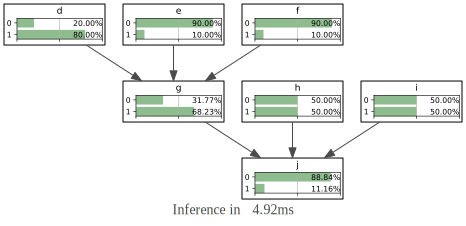

In [22]:
gnb.showInference(rede,evs={})

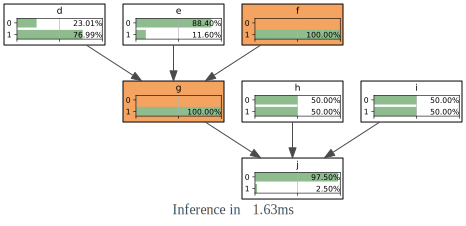

In [23]:
gnb.showInference(rede,evs={'f':1,'g':1})

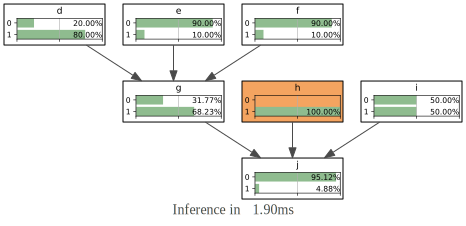

In [24]:
gnb.showInference(rede,evs={'h':1})